This dataset is from the US Arrests Kaggle challenge. A description of the data is given as: “This data set contains statistics, in arrests per 100,000 residents, for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.”

In [54]:
# Import libralies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Get a quick overview of the dataset(UsArrests.csv).

In [55]:
arrests_df = pd.read_csv('UsArrests.csv')
arrests_df.head(10)

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


**Determine the type of each variable**

In [56]:
# Examine types
arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


**Summarise the properties of the columns**

In [57]:
# Get the summary of the DataFrame
arrests_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Check for missing data on the dataset**

In [58]:
# Count missing values
arrests_df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

**Use histogram to observe each feature**

Histograms to provide a visual representation of the distribution of values in each numerical column of the UsArrests dataset.

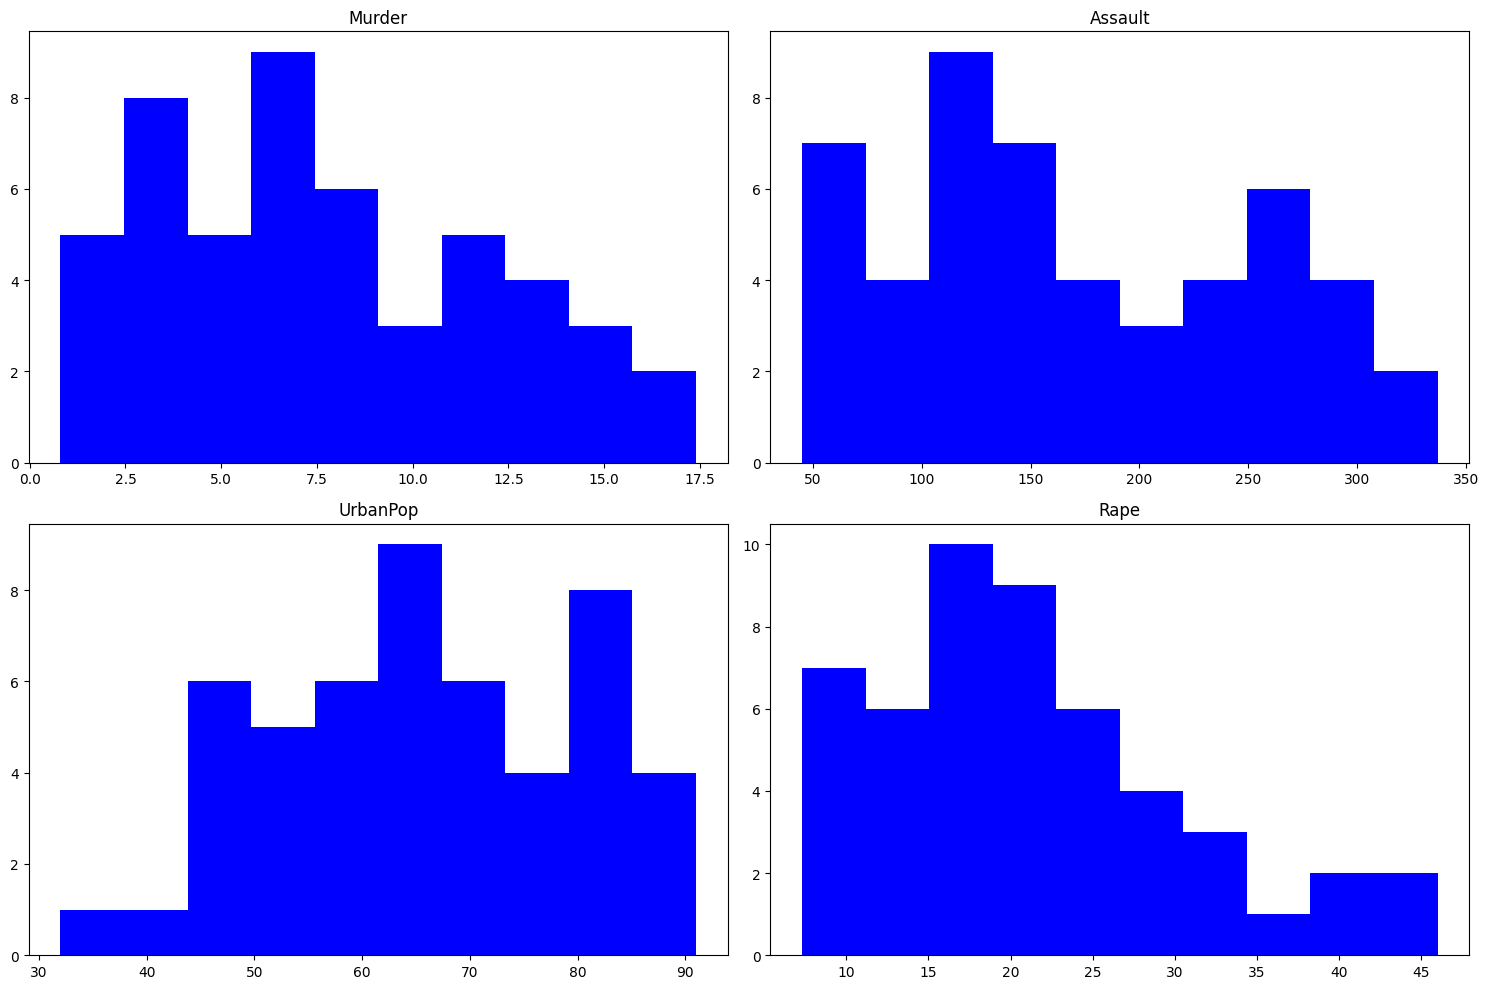

In [59]:
# Plot histograms
histograms = arrests_df.hist(color='blue', grid=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Show positive and negative correlation between features**

The correlation matrix will show the correlation coefficients between each pair of numerical columns in the DataFrame.

In [60]:
# Calculate the correlation matrix, exclude the city.
correlation_matrix = arrests_df.iloc[:, 1:].corr()
correlation_matrix

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


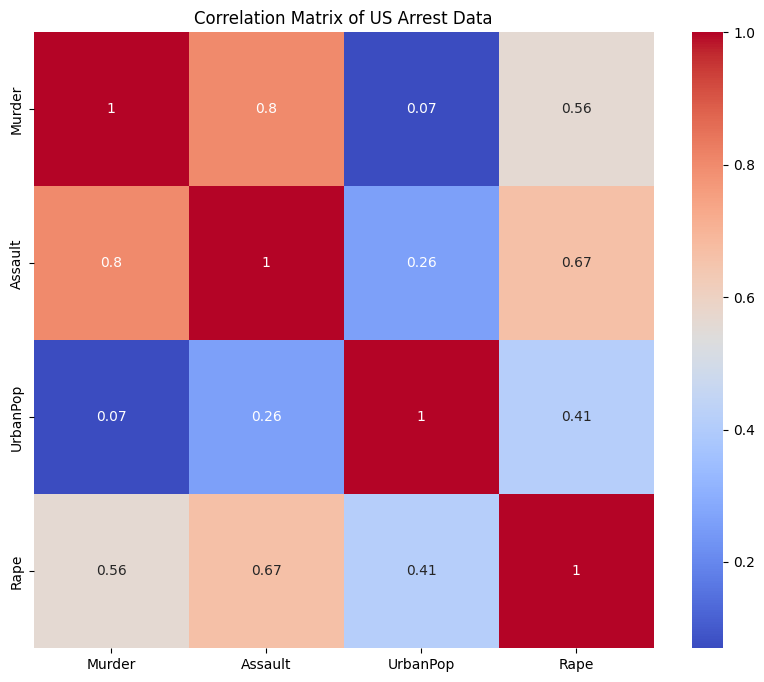

In [70]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of US Arrest Data')
plt.show()

**Murder and Assault:** A high positive correlation(0.8) suggests that cities with higher murder rates also tend to have higher assault rates.

**UrbanPop and murder:** A very low positive correlation(0.07) indicates that cities with higher urban populations tend to have lower murder rates.

**Assault and rape:** The correlation of 0.67, there is a strong relationship between assault rates and rape rates.

**Standardizing the Data**

PCA is sensitive to the scale of the data, so we need to standardize the features.

In [62]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(arrests_df.iloc[:, 1:])

**Perform PCA**

Reduce the dimensionality of the dataset and interpret the principal component.

In [63]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['City'] = arrests_df['City']

pca_df.head()

,PC1,PC2,City
0,0.985566,-1.133392,Alabama
1,1.950138,-1.073213,Alaska
2,1.763164,0.745957,Arizona
3,-0.141420,-1.119797,Arkansas
4,2.523980,1.542934,California


**Explained Variance**

Check the explained variance to understand how much information is retained by the principal components.

In [64]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]}")
print(f"Explained variance by PC2: {explained_variance[1]}")

Explained variance by PC1: 0.6200603947873733
Explained variance by PC2: 0.2474412881349604


**Explained variance by PC1:** This value(0.6200603947873733) indicates that the first principal component captures approximately 62% of the total variance in the dataset.

**Explained variance by PC2:** This value(0.2474412881349604) indicates that the first principal component captures approximately 24.7% of the total variance in the dataset.

## Clustering

**K-Means clustering**

Add K-Means clustering to help get an understanding of how different cities group together based on their crime rates.

In [65]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the PCA DataFrame
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df.head()

,PC1,PC2,City,KMeans_Cluster
0,0.985566,-1.133392,Alabama,1
1,1.950138,-1.073213,Alaska,2
2,1.763164,0.745957,Arizona,2
3,-0.141420,-1.119797,Arkansas,1
4,2.523980,1.542934,California,2


**Hierarchical Clustering**

Add Hierarchical Cluster to help understand the relationship between cities based on their crime rates.

In [68]:
# Perform hierarchical clustering
linked = linkage(scaled_df, method='ward')
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# Add the cluster labels to the PCA DataFrame
pca_df['Hierarchical_Cluster'] = hierarchical_labels
pca_df.head()

,PC1,PC2,City,KMeans_Cluster,Hierarchical_cluster,Hierarchical_Cluster
0,0.985566,-1.133392,Alabama,1,1,1
1,1.950138,-1.073213,Alaska,2,1,1
2,1.763164,0.745957,Arizona,2,1,1
3,-0.141420,-1.119797,Arkansas,1,3,3
4,2.523980,1.542934,California,2,1,1


**Visualize The Results**

Visualize the PCA results and the clusters

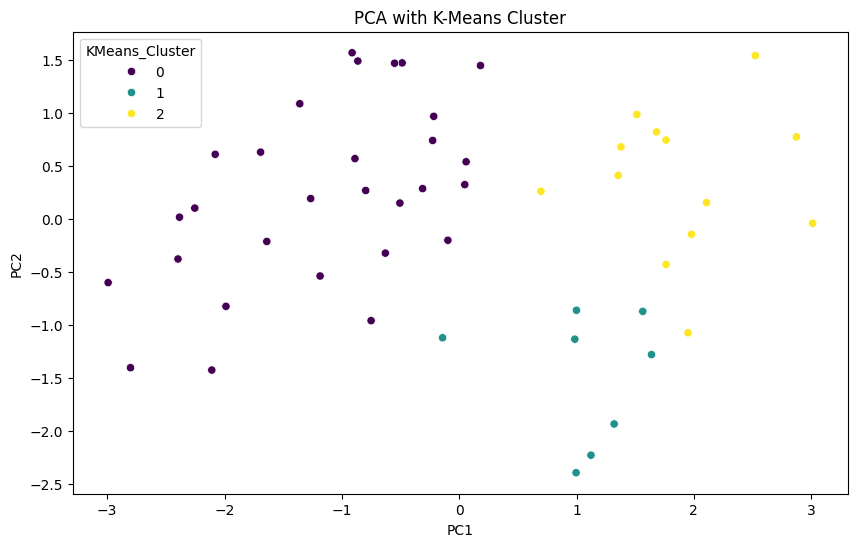

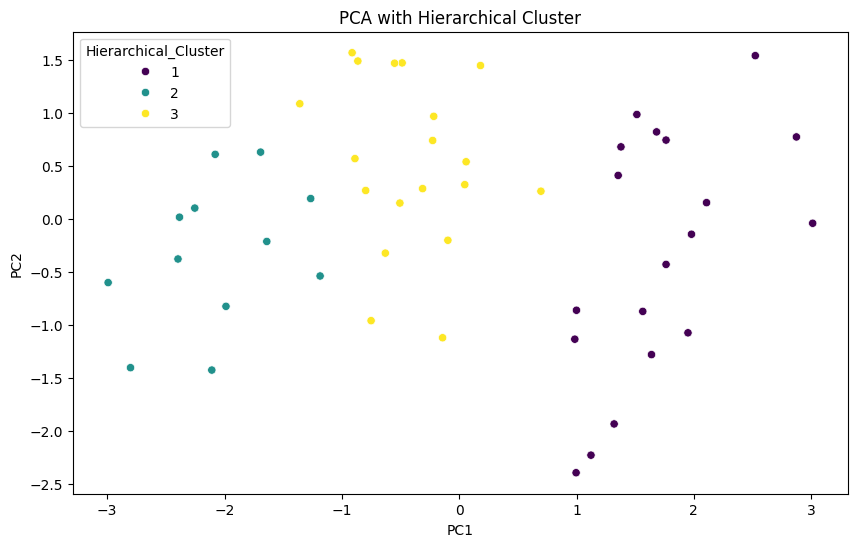

In [69]:
# Plot PCA results with K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis')
plt.title('PCA with K-Means Cluster')
plt.show()

# Plot PCA results with Hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='viridis')
plt.title('PCA with Hierarchical Cluster')
plt.show()

**K-Means Clustering:** The separation between clusters indicates that the K-Means algorithm has effectively grouped cities together based on their principal components.

**Hierarchical Clustering:** The separation between clusters indicates that the hierarchical clustering algorithm has effectively grouped cities based on their crime rates.